# Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [5]:
# Load your dataset
# Assuming your dataset is stored in a Excel file named 'EastWestAirlines.csv'
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Data Preprocessing

In [6]:
# Handle missing values
data.dropna(inplace=True)

In [7]:
# Remove outliers (you can use any method suitable for your data)
# For example, you can use Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [8]:
# Scale the features if necessary
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


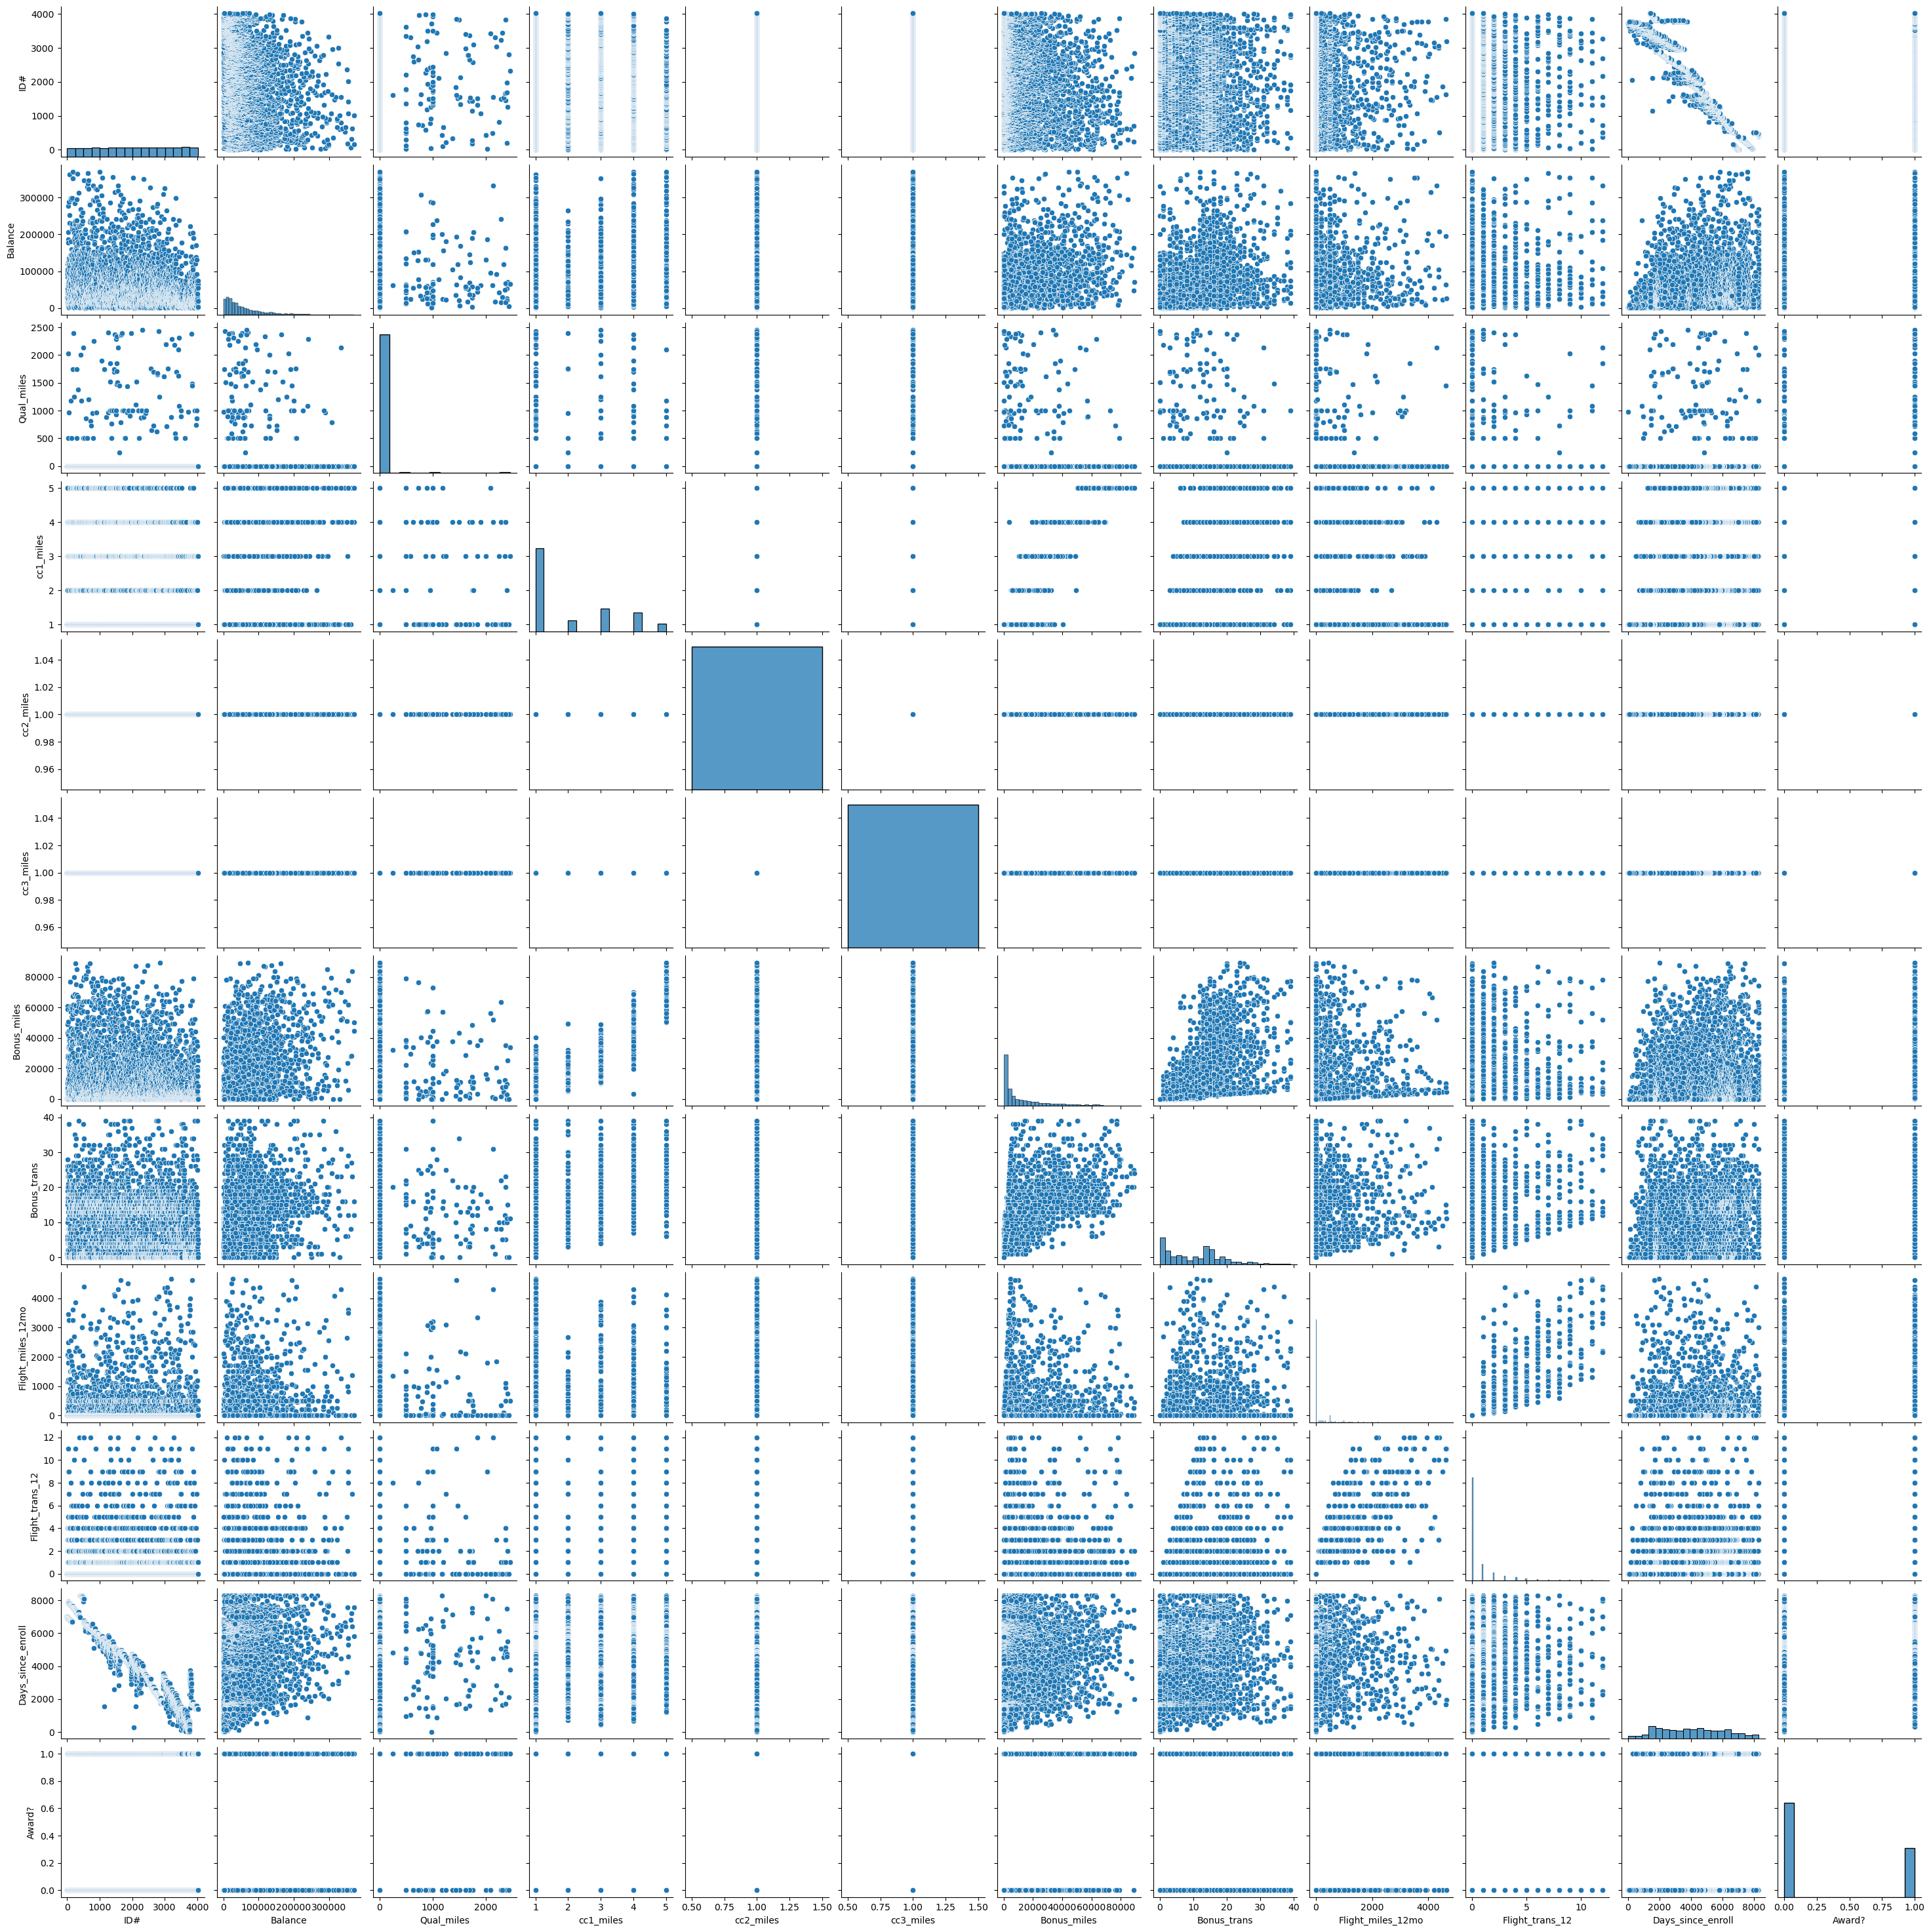

In [9]:
# Perform Exploratory Data Analysis (EDA)
# For example, you can use pairplot to visualize pairwise relationships
sns.pairplot(data)
plt.show()

# Implementing Clustering Algorithms

In [10]:
# K-Means
# Find optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

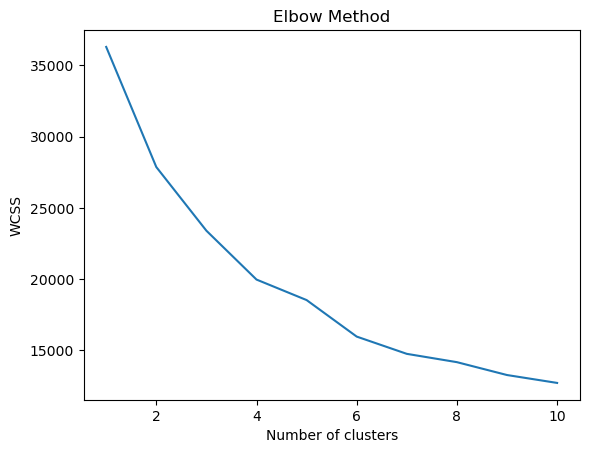

In [11]:
# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Based on the Elbow curve, choose the optimal number of clusters and fit K-Means
optimal_k = 3  # Change this value based on the Elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

# Hierarchical Clustering

In [13]:
# You can choose the linkage criteria based on your data
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(scaled_data)

# DBSCAN

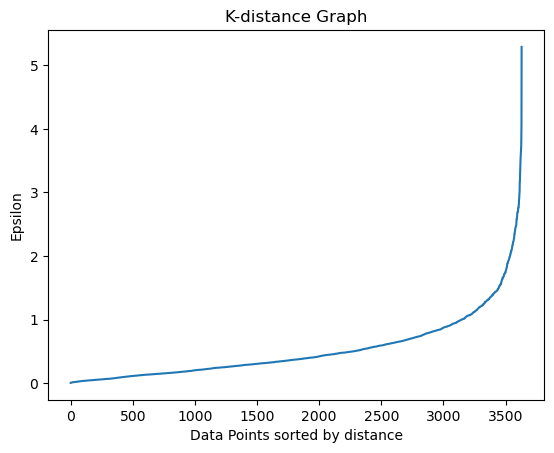

In [14]:
# Find optimal epsilon using NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data)
distances, indices = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [15]:
# Based on the K-distance graph, choose epsilon
epsilon = 0.5
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [16]:
dbscan_labels

array([ 0,  0,  0, ..., -1, 24,  0], dtype=int64)

# Visualization


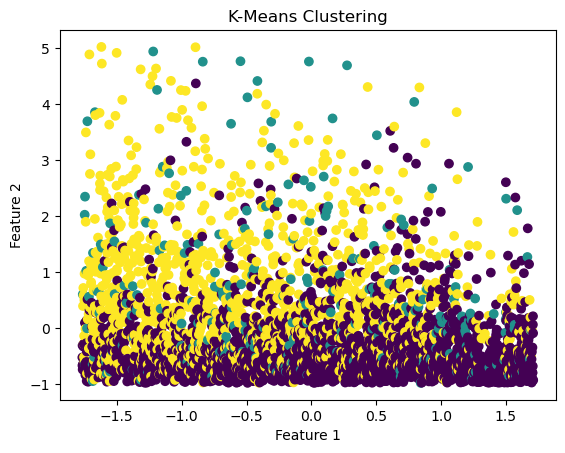

In [17]:
# Plot the clusters using scatter plot
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Repeat the above process for hierarchical clustering and DBSCAN

# Evaluation and Performance Metrics


In [18]:
# Silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.29192710837860614


In [19]:
# Silhouette score for DBSCAN
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

DBSCAN Silhouette Score: -0.3994552312980999


In [20]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} centroid:", centroid)

Cluster 1 centroid: [2.33231236e+03 3.65085034e+04 2.72704058e+01 1.18467852e+00
 1.00000000e+00 1.00000000e+00 3.96015504e+03 6.15731874e+00
 9.63447332e+01 3.44277246e-01 3.52870816e+03 1.86958504e-01]
Cluster 2 centroid: [1.92642629e+03 9.71697371e+04 1.59533865e+02 2.01593625e+00
 1.00000000e+00 1.00000000e+00 1.90856494e+04 1.59243028e+01
 2.18692430e+03 6.19123506e+00 4.32283267e+03 6.25498008e-01]
Cluster 3 centroid: [1.53312732e+03 9.71607445e+04 3.69688027e+01 3.49578415e+00
 1.00000000e+00 1.00000000e+00 3.24038010e+04 1.72723440e+01
 1.42278246e+02 4.56155143e-01 4.99229511e+03 5.63237774e-01]


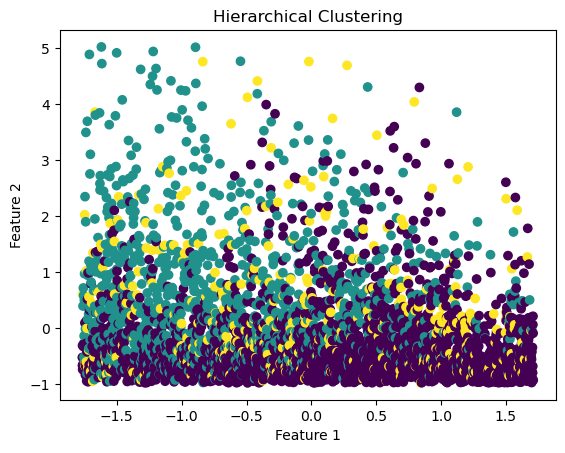

In [21]:
# Visualize hierarchical clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

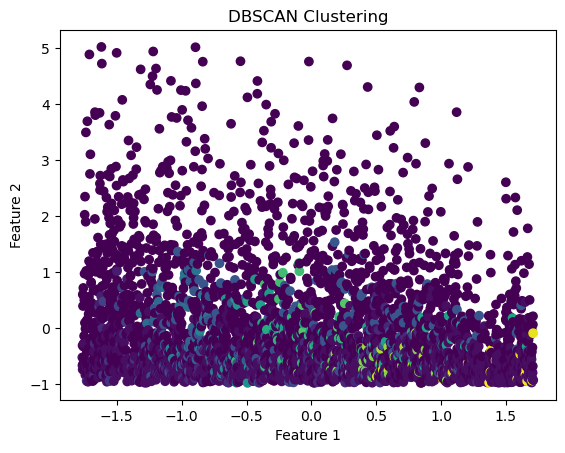

In [22]:
# Visualize DBSCAN clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [23]:
# Silhouette score for Hierarchical Clustering
agglomerative_silhouette_score = silhouette_score(scaled_data, agglomerative_labels)
print("Hierarchical Clustering Silhouette Score:", agglomerative_silhouette_score)


Hierarchical Clustering Silhouette Score: 0.26359050526851413
